# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 8__

__Nombres de los estudiantes: Enrique Cavanillas y Víctor Fernández__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [1]:
import pandas as pd
df = pd.read_csv('countries_of_the_world.csv', index_col='Country')

    # Eliminamos la columna 'Region'. axis = 1 : eliminar columna
df = df.drop(['Region'], axis = 1)

    # Eliminamos filas con datos vacíos
df = df.dropna()
print('Numero de paises, variables:', df.shape)
df


Numero de paises, variables: (179, 18)


,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [2]:
    #Creamos el nuevo dataframe según la selección de columnas colSubset
colSubset = ['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)','Agriculture', 'Industry', 'Service']
midf = pd.DataFrame(df, columns=colSubset)
midf

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380
Albania,4500.0,86.5,71.2,0.232,0.188,0.579
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780
Antigua & Barbuda,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
Venezuela,4800.0,93.4,140.1,0.040,0.419,0.541
Vietnam,2500.0,90.3,187.7,0.209,0.410,0.381
Yemen,800.0,50.2,37.2,0.135,0.472,0.393


In [3]:
    #Representamos datos
midf.describe().drop(['count'], axis=0)

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


Lo primero que observamos es que la desviación típica (std) en las variables GPD y número de teléfonos es muy elevada, como es de esperar, indicando que hay enormes diferencias en la economía de distintos países, con cambios abismales entre países ricos y pobres. Mostramos a continuación los 5 países con menor cantidad de teléfonos por 1000 habitantes, comparado con los 5 mayores, y se ve que en efecto los primeros países pobres no superan los 3 móviles, mientras que los ricos alcanzan casi los 900. Parece plausible pensar, como comprobaremos más adelante en una gráfica, que entre estas 2 variables existe una relación  directa.

Además, fijándonos en los cuartiles de ambas variables, vemos como el mayor salto se da entre el 100% y el 75%, lo cual nos hace pensar que el número de países ricos es bastante reducido en comparación con los pobres.

In [4]:
midf.sort_values(['Phones (per 1000)'])

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
"Congo, Dem. Rep.",700.0,65.5,0.2,0.550,0.110,0.340
Chad,1200.0,47.5,1.3,0.335,0.259,0.406
Niger,800.0,17.6,1.9,0.390,0.170,0.440
Central African Rep.,1100.0,51.0,2.3,0.550,0.200,0.250
Liberia,1000.0,57.5,2.3,0.769,0.054,0.177
...,...,...,...,...,...,...
Switzerland,32700.0,99.0,680.9,0.015,0.340,0.645
Sweden,26800.0,99.0,715.0,0.011,0.282,0.707
Cayman Islands,35000.0,98.0,836.3,0.014,0.032,0.954


Respecto al nivel de cultura de los países se observa justo el efecto contrario: Una media muy elevada frente a una desviación típica pequeña. De nuevo viendo los cuartiles observamos que más de el 50% de los países superan el 90%, y parecen ser pocos los países con un nivel de analfabetismo exagerado. Aunque este dato también está relacionado con la economía del país, no se trata de una ligadura tan fuerte como las 2 variables estudiadas anteriormente. 

En la siguiente tabla se ve como entre los países con mayor valor en este parametro existe bastante variabilidad en el GPD y número de móviles.

In [5]:
midf.sort_values(['Literacy (%)']).tail(10)

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
Country,,,,,,
Estonia,12300.0,99.8,333.8,0.040,0.294,0.666
Poland,11100.0,99.8,306.3,0.050,0.311,0.640
Latvia,10200.0,99.8,321.4,0.040,0.261,0.699
Czech Republic,15700.0,99.9,314.3,0.034,0.393,0.573
Iceland,30900.0,99.9,647.7,0.086,0.150,0.765
Finland,27400.0,100.0,405.3,0.028,0.295,0.676
Norway,37800.0,100.0,461.7,0.021,0.415,0.564
Denmark,31100.0,100.0,614.6,0.018,0.246,0.735
Liechtenstein,25000.0,100.0,585.5,0.060,0.390,0.550


La distribución de los cuartiles en los distintos sectores económicos nos lleva a pensar que algunos países están fuertemente especializados en un solo sector, debido al gran salto entre el 75% y el 100%.

La mayoría de países se mantiene por debajo de la media mientras que unos pocos aumentan este valor, al fundamentar su economía en un sector en concreto.
Además, mirando ahora el salto entre el 0% y el 25%, observamos que hay muchos países con escasa agricultura, muchos con escasa industria, pero en cambio el sector servicios da un salto mayor, significando que muchos países oscilan en un rango parecido cercano a la media.

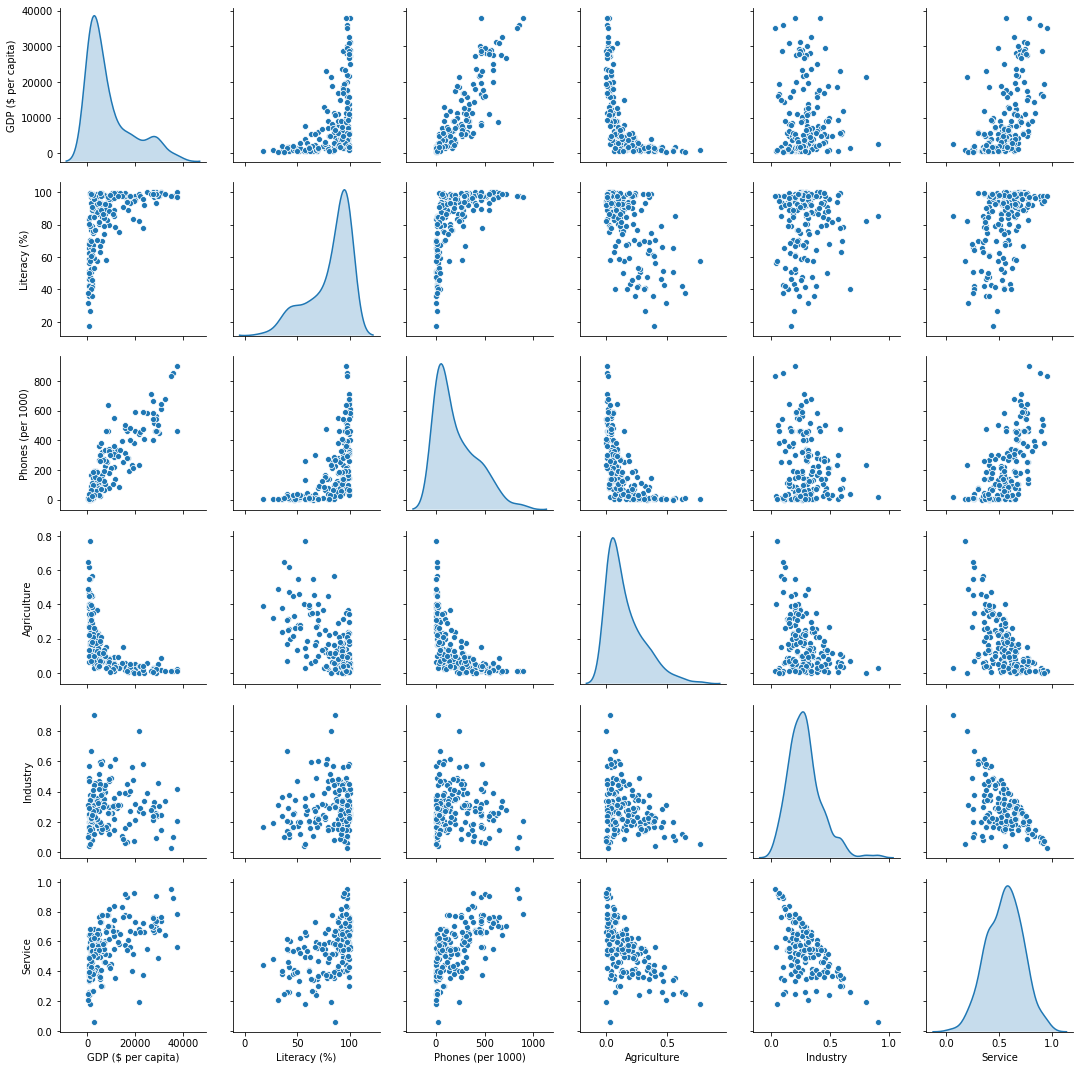

In [7]:
    #Vamos a representar el diagrama de pares para ver cómo se relacionan nuestras variables
import seaborn as sns
sns.pairplot(midf, diag_kind='kde')

Como mencionamos antes, el GDP y el nº de móviles por habitante se relacionan de forma casi lineal. (Cuanto más ricos son los países más móviles pueden comprar sus ciudadanos). Asimismo, en los países más ricos hay menos analfabetismo, y el sector agrícola es más reducido, aunque no se trata de una escala lineal. La forma picuda de la gráfica indica que también hay países bien formados pero sin un gran rendimiento económico.

Existe también cierta tendencia de los países ricos a centrarse en el sector servicios, pero está lejos de ser una relación tan fuerte como las anteriores.

Nos llama la atención ver la relación inversa que existe entre la cultura del país y su desarrollo en el sector agrícola. Se aprecia una inclinación por los países con una mayor formación a rechazar este sector y centrarse en los otros, pues requieren mas conocimientos específicos.

Observamos que los países que son punteros en algún sector no destacan en el resto de los sectores, lo cual es lógico porque estas variables se tratan de un porcentaje y suman 1 entre las tres.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandardScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

Tenemos que reescalar los datos, pues las distintas variables tienen rangos muy variados. Literacy es un porcentaje en [0,100], los 3 sectores oscilan en [0,1], y GDP per capita y móviles por 1000 habitantes no tienen, a priori, cota superior.

Usaremos MinMaxScaler, que preserva la distribución original de los datos, restringidos al intervalo [0,1], ya que no podemos asumir que los datos sigan una distribución normal. De hecho, algunas de las gráficas anteriores disciernen bastante de lo esperado para una distribución normal.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(midf)
dfScaled = scaler.transform(midf)

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import numpy as np
RANDOM_STATE = 1
K_MAX = 11
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(dfScaled)

    score[k-2] = -1 * km.score(dfScaled)
    davies_boulding[k-2] = davies_bouldin_score(dfScaled, km.labels_)
    silhouette[k-2] = silhouette_score(dfScaled, km.labels_)

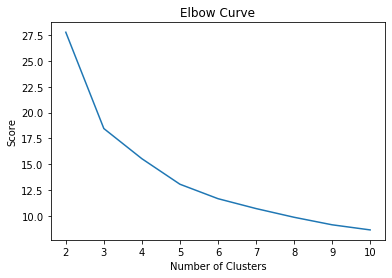

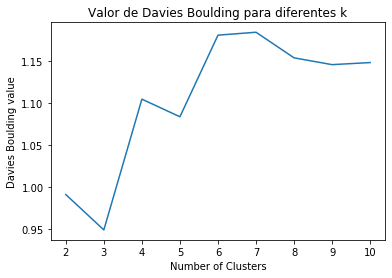

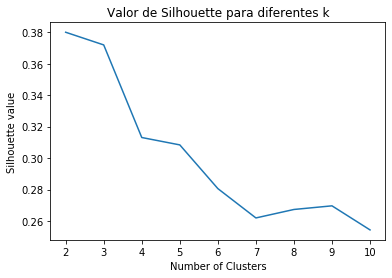

In [10]:
import matplotlib.pyplot as plt
# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

En el diagrama de codo observamos que el pico más pronunciado es el 3, lo cual nos coincide con la medida de Davies Boulding, que alcanza su mínimo usando 3 clusters. Aunque la medida de Silhouette indicaría que lo adecuado es coger 2, la diferencia que hay entre el 2 y el 3 es muy leve, lo que hace que nos decantemos por elegir 3 clusters, acorde con lo visto en las medidas anteriores.

Para los apartados posteriores, clasificamos los datos de nuestro dataframe escalado en 3 clusters.

In [11]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(dfScaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [12]:
# añadimos una columna con el cluster al que pertenece cada punto
midf['cluster'] = km.labels_

# asignamos color a cada cluster
dic_colors = { 0: 'blue', 1: 'orange', 2: 'green' }
colors = midf['cluster'].map(dic_colors)

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: GDP ($ per capita), dtype: object

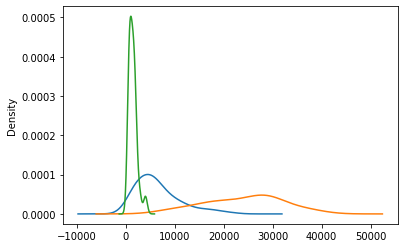

In [13]:
midf.groupby(['cluster'])[colSubset[0]].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Literacy (%), dtype: object

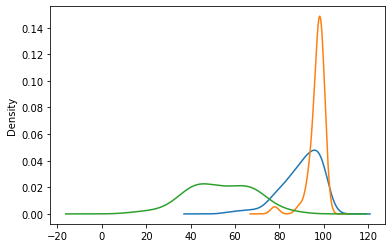

In [14]:
midf.groupby(['cluster'])[colSubset[1]].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Phones (per 1000), dtype: object

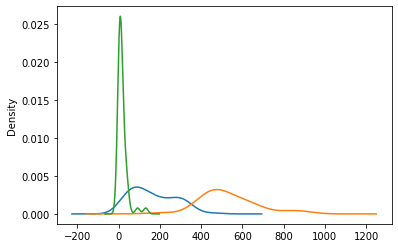

In [15]:
midf.groupby(['cluster'])[colSubset[2]].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Agriculture, dtype: object

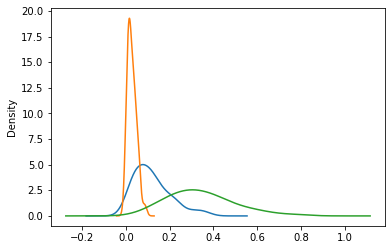

In [16]:
midf.groupby(['cluster'])[colSubset[3]].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Industry, dtype: object

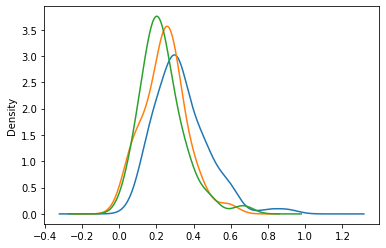

In [17]:
midf.groupby(['cluster'])[colSubset[4]].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Service, dtype: object

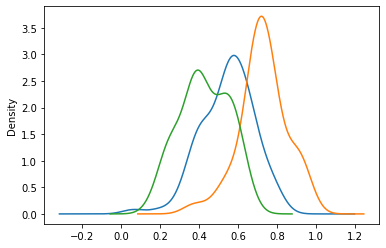

In [18]:
midf.groupby(['cluster'])[colSubset[5]].plot.density()

''

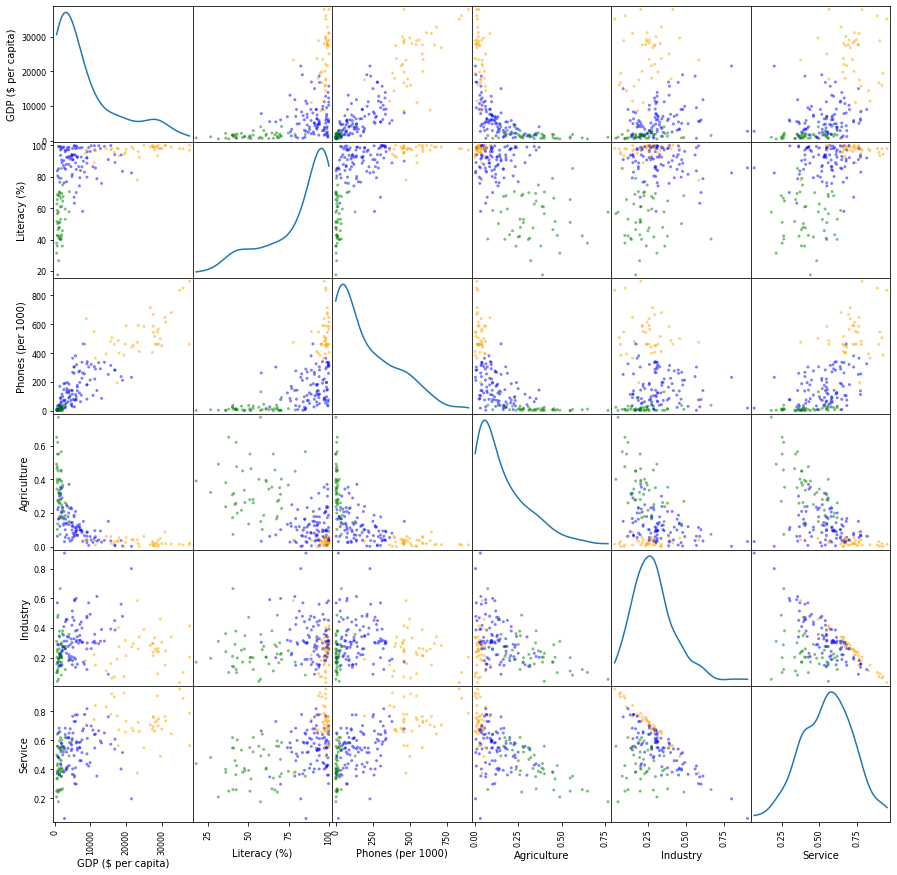

In [19]:
from pandas.plotting import scatter_matrix

midf = midf.drop(['cluster'],axis=1)

scatter_matrix(midf, figsize = (15, 15), diagonal = 'kde', color=colors)
""

El algoritmo ha dividido los países en tres grupos que podríamos nombrar:

    Verde: Formado por los países con menos recursos.
    Azul: Países en vías de desarrollo, en transición a ser del siguiente grupo.
    Naranja: Países del primer mundo.
    
La primera diferencia clara se ve en las gráficas del GDP y los móviles, donde los países del grupo verde destacan a la izquierda de la gráfica en el lugar con valores extremadamente pequeños.

El grupo naranja se diferencia notoriamente de los otros 2 en cuanto a la alfabetización de sus poblaciones y la poca importancia del sector agrícola.

El grupo azul se encuentra entre medias de ambos en todas las variables, tratándose de una separación bastante homogénea que refleja como distintos países se encuentran a distintas alturas de su transición a ser un país rico. Como no hay una clara linea divisoria entre el cluster azul y los otros, pensamos que posiblemente, si el algoritmo tomara otros puntos iniciales, veríamos que algunos países azules pasarían a ser verdes y viceversa, y lo mismo con los naranjas.

A nuestro parecer y según la representación gráfica de los datos, la elección de 3 clusters parece la más correcta, y muestra una clasificación muy parecida a la que haría un ser humano. 
En vez de hacer una separación naive en dos clusters de países con grandes riquezas y países en desarrollo, podemos ver también una clasificación en países que no se representan correctamente por estos adjetivos.
Este grupo especial parece insinuar qué trayectoria recorren los países para transicionar de un extremo a otro, viendo cómo agrupa países que no se especializan en ningún sector concreto.